In [1]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from scipy.stats import norm
from scipy.stats import linregress

In [2]:
# lecture des dataframes 
returns = pd.read_excel('./data/stocks_data.xlsx', sheet_name='Returns', header=[5,6]).T.iloc[2:,:]
returns = returns.rename(columns=returns.iloc[0])

# Remove the first row
returns = returns.iloc[2:]
returns.head()

,,BP/ LN Equity,STERV FH Equity,IP US Equity,UPM FH Equity,NEM US Equity,XOM US Equity,VLO US Equity,NUE US Equity,ABX CT Equity,FMC US Equity,...,MRO US Equity,WMB US Equity,CTRA US Equity,APA US Equity,EOG US Equity,KMI US Equity,EQT US Equity,HAL US Equity,FANG US Equity,S5ENRS Index
2017-09-30 00:00:00,2017-10-31 00:00:00,5.919372,10.90907,0.791975,11.03876,-3.59904,1.671139,2.547771,3.194147,-10.14396,3.974919,...,4.867257,-5.031656,3.551402,-9.12874,3.413359,-4.926647,-4.138565,-7.147512,9.391588,-0.662957
2017-10-31 00:00:00,2017-11-30 00:00:00,-0.988737,-2.246577,-0.288225,0.068212,2.295354,0.855728,9.456333,-0.570638,-4.224525,1.658411,...,4.711674,1.929825,4.700338,1.111917,2.453189,-4.859194,-4.657615,-2.24614,2.006346,1.762193
2017-11-30 00:00:00,2017-12-31 00:00:00,6.988426,3.931891,2.349408,3.580244,1.644609,0.420218,7.346415,11.22698,5.066067,0.449586,...,14.08356,6.062945,-1.208981,0.932345,5.463253,4.875217,-4.496644,17.45519,15.49721,4.883477
2017-12-31 00:00:00,2018-01-31 00:00:00,0.546154,7.955951,8.491543,8.171395,7.969083,4.375897,4.417365,5.316137,-1.036262,-3.517853,...,7.44241,2.951787,-7.672212,6.85361,6.727716,0.184205,-4.62052,9.883364,-0.594059,3.81178
2018-01-31 00:00:00,2018-02-28 00:00:00,-6.449286,3.713166,-4.425673,2.290289,-5.702296,-12.36014,-4.934638,-2.329749,-19.47323,-14.06986,...,-19.92411,-11.56419,-8.311195,-23.89124,-11.8087,-9.899889,-7.272312,-13.5568,-0.685259,-10.81908


In [5]:
returns.reset_index(inplace=True)
returns.rename(columns={"level_0": "date1", "level_1": "date2"}, inplace=True)

In [6]:
returns.replace('#N/A N/A', np.nan, inplace=True)

In [8]:
list_stocks = ['BP/ LN Equity', 'STERV FH Equity', 'IP US Equity',
       'UPM FH Equity', 'NEM US Equity', 'XOM US Equity', 'VLO US Equity',
       'NUE US Equity', 'ABX CT Equity', 'FMC US Equity', 'FCX US Equity',
       'TTE FP Equity', 'COP US Equity', 'ADM US Equity', 'PKX US Equity',
       'BHP US Equity', 'TECK/B CT Equity', 'RIO US Equity', 'WIL SP Equity',
       'MNDI LN Equity', 'AAL LN Equity', 'CVE CT Equity', 'ALA CT Equity',
       'WLK US Equity', 'GLEN LN Equity', 'MOS US Equity', 'MPC US Equity',
       'PSX US Equity', 'WY US Equity', 'ET US Equity', 'VNOM UW Equity',
       'SUN US Equity', 'WRK US Equity', 'PBA US Equity', 'AA US Equity',
       'MTS SQ Equity', 'NTR CT Equity', 'NTR US Equity', 'DOW US Equity',
       'CTVA US Equity', 'OXY US Equity', 'OKE US Equity', 'CVX US Equity',
       'PXD US Equity', 'TRGP US Equity', 'SLB US Equity', 'BKR US Equity',
       'DVN US Equity', 'HES US Equity', 'MRO US Equity', 'WMB US Equity',
       'CTRA US Equity', 'APA US Equity', 'EOG US Equity', 'KMI US Equity',
       'EQT US Equity', 'HAL US Equity', 'FANG US Equity']

Une façon réputée pour imputer les valeurs manquantes est celle d'interpoler. Surtout dans un cadre de time series

In [9]:
# Select the columns for the actions
df_stocks = returns[list_stocks].astype(float)

In [20]:
# df_stocks = df_stocks.fillna(df_stocks.mean())

In [11]:
df_stocks = df_stocks.interpolate(method='spline', order=3)

In [13]:
# stocks and date dataframe
df_stocks_and_date = df_stocks.copy()
df_stocks_and_date['date'] = returns['date2']
# plot
fig = px.line(df_stocks_and_date, x='date', y=list_stocks)
fig.update_layout(title="Rendement cumulé des actifs pour la période 2017 - 2022 (base 100)", xaxis_title="Date", yaxis_title="Prix")
fig.show()


# qst 1

In [15]:
summary_stats = df_stocks.describe().T

skewness = df_stocks.skew()

kurtosis = df_stocks.kurt()

summary_stats['skewness'] = skewness
summary_stats['kurtosis'] = kurtosis

summary_stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
BP/ LN Equity,60.0,0.340750,8.215153,-17.42225,-4.775288,0.240264,4.845354,32.56261,0.717428,3.084020
STERV FH Equity,60.0,0.523926,9.403090,-21.38297,-4.456746,1.802086,7.828605,17.16692,-0.344520,-0.449652
IP US Equity,60.0,-0.226696,7.744599,-23.83469,-4.766816,0.846089,4.732543,17.51734,-0.437574,0.545165
UPM FH Equity,60.0,0.933991,7.545553,-18.17581,-3.391470,1.360282,6.047841,16.86093,-0.378970,0.161751
NEM US Equity,60.0,0.828072,9.153569,-24.11597,-4.713372,-0.518354,4.899593,31.36042,0.535311,1.808924
XOM US Equity,60.0,0.992708,9.524520,-26.18585,-4.474271,1.752606,5.669578,24.13793,0.086027,0.944225
VLO US Equity,60.0,1.916323,14.380837,-31.53208,-7.380648,2.168741,9.631668,41.78483,0.539300,1.032024
NUE US Equity,60.0,1.997453,12.152629,-20.80527,-6.005346,1.085803,8.014501,34.86191,0.536364,0.376308
ABX CT Equity,60.0,0.645320,10.680218,-19.47323,-6.544863,-0.315891,7.009773,41.11017,1.033056,2.599296
FMC US Equity,60.0,0.890610,6.840611,-14.06986,-2.786981,0.744144,6.034573,13.47764,-0.160067,-0.395547


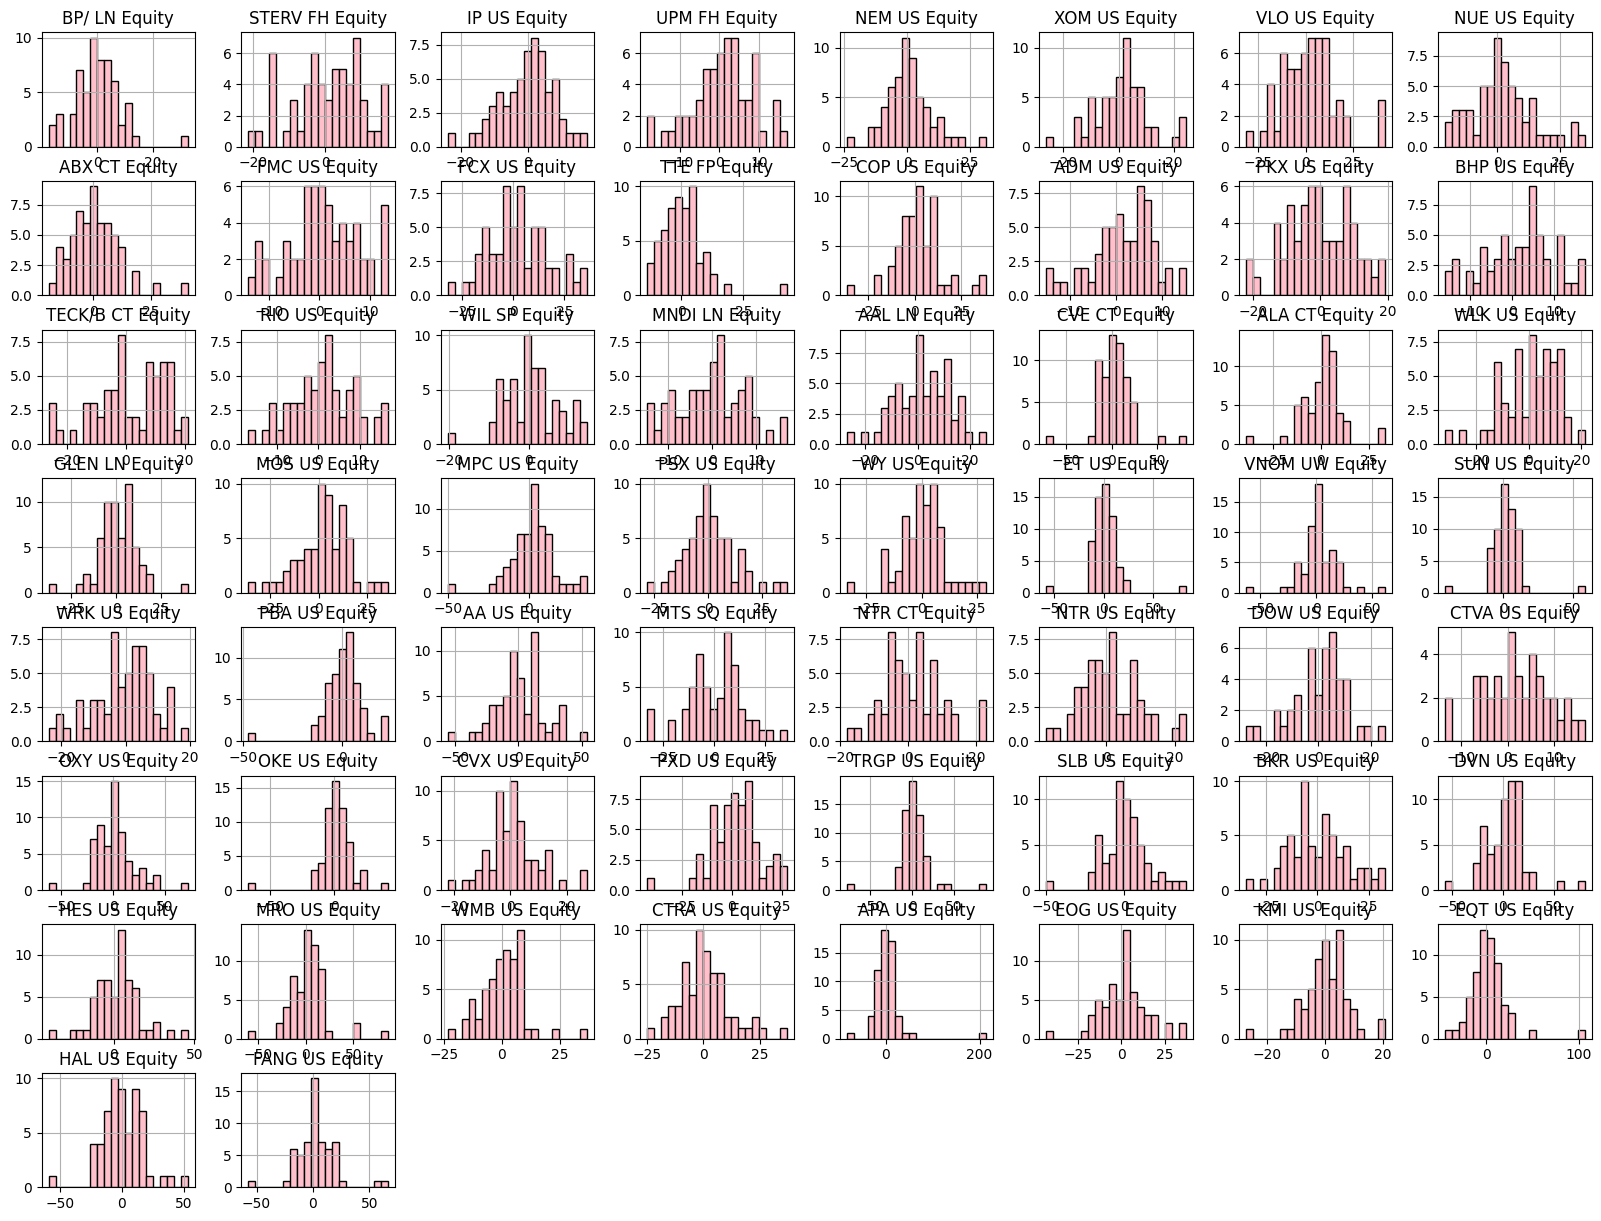

In [17]:
# create a histogram for each stock
df_stocks.hist(bins=20, figsize=(20,15),edgecolor='black',color='pink')
plt.show()

# qst 2

In [19]:

cumulative_returns = df_stocks.cumsum() + 100 

cumulative_returns['date'] = returns['date2']

# plot
fig = px.line(cumulative_returns, x='date', y=list_stocks)
fig.update_layout(title="Rendement cumulé des actifs pour la période 2017 - 2022 (base 100)", xaxis_title="Date", yaxis_title="Return")
fig.show()


# Qst 3

In [14]:
# Correlation
correlation_matrix = df_stocks.corr().round(2)

correlations_df = pd.DataFrame(correlation_matrix)

correlations_df

,BP/ LN Equity,STERV FH Equity,IP US Equity,UPM FH Equity,NEM US Equity,XOM US Equity,VLO US Equity,NUE US Equity,ABX CT Equity,FMC US Equity,...,HES US Equity,MRO US Equity,WMB US Equity,CTRA US Equity,APA US Equity,EOG US Equity,KMI US Equity,EQT US Equity,HAL US Equity,FANG US Equity
BP/ LN Equity,1.00,0.39,0.39,0.43,-0.14,0.74,0.70,0.24,-0.18,0.27,...,0.62,0.63,0.45,0.24,0.33,0.75,0.69,0.08,0.63,0.66
STERV FH Equity,0.39,1.00,0.54,0.84,0.07,0.47,0.58,0.39,0.09,0.46,...,0.53,0.52,0.45,0.05,0.43,0.48,0.37,0.25,0.60,0.47
IP US Equity,0.39,0.54,1.00,0.49,0.09,0.50,0.53,0.59,-0.01,0.47,...,0.53,0.47,0.66,0.18,0.38,0.50,0.61,0.32,0.56,0.43
UPM FH Equity,0.43,0.84,0.49,1.00,-0.11,0.37,0.55,0.40,-0.07,0.39,...,0.45,0.44,0.32,-0.09,0.30,0.40,0.33,0.11,0.44,0.40
NEM US Equity,-0.14,0.07,0.09,-0.11,1.00,0.01,0.13,0.17,0.79,0.38,...,0.17,0.16,0.23,0.05,0.36,0.14,0.13,0.33,0.25,0.14
XOM US Equity,0.74,0.47,0.50,0.37,0.01,1.00,0.79,0.43,0.06,0.43,...,0.84,0.88,0.78,0.38,0.68,0.90,0.77,0.41,0.81,0.83
VLO US Equity,0.70,0.58,0.53,0.55,0.13,0.79,1.00,0.47,0.06,0.45,...,0.77,0.84,0.70,0.28,0.67,0.82,0.66,0.45,0.80,0.74
NUE US Equity,0.24,0.39,0.59,0.40,0.17,0.43,0.47,1.00,0.17,0.48,...,0.40,0.43,0.53,0.14,0.31,0.42,0.49,0.31,0.45,0.33
ABX CT Equity,-0.18,0.09,-0.01,-0.07,0.79,0.06,0.06,0.17,1.00,0.37,...,0.24,0.21,0.24,0.03,0.43,0.12,0.13,0.28,0.25,0.18
FMC US Equity,0.27,0.46,0.47,0.39,0.38,0.43,0.45,0.48,0.37,1.00,...,0.49,0.41,0.50,0.06,0.41,0.46,0.55,0.26,0.45,0.39


Le graphique va être encombré vu qu'on à peu près 60 actions.

On va donc faire un plot plus beau visuellement de la matrice de corrélation, en utilisant la fonction clustermap(), qui regroupe des actions similaires en fonction de leur coefficient de corrélation. 

Cela créera un graphique de clustermap où des stocks similaires sont regroupés et la couleur de chaque cellule représente l'ampleur du coefficient de corrélation (le bleu représente une faible corrélation et le rouge représente une corrélation élevée).

Ou pairplot de seaborn pour représenter la matrice de corrélation entre tous les stocks.

Cela créera une matrice de nuages de points qui montrera la corrélation entre tous les stocks.

Avec 60 actions, la visualisation deviendra assez complexe et il sera peut-être difficile de la comprendre. Dans ce cas, vous pouvez envisager de regrouper les actions en fonction de leur corrélation et de visualiser les grappes au lieu de toutes les actions.

In [15]:
# sns.clustermap(correlation_matrix, cmap='coolwarm', annot = True)

In [17]:
strong_threshold = 0.7
weak_threshold = 0.3

corr_level = np.where(correlations_df > strong_threshold, 'strong',
              np.where(correlations_df < weak_threshold, 'weak', 'moderate'))

strong_corr = []
moderate_corr = []
weak_corr = []

for i, row in enumerate(corr_level):
    for j, value in enumerate(row):
        if value == 'strong':
            strong_corr.append((correlations_df.columns[i], correlations_df.columns[j]))
        elif value == 'moderate':
            moderate_corr.append((correlations_df.columns[i], correlations_df.columns[j]))
        else:
            weak_corr.append((correlations_df.columns[i], correlations_df.columns[j]))

In [18]:
strong_corr

[('BP/ LN Equity', 'BP/ LN Equity'),
 ('BP/ LN Equity', 'XOM US Equity'),
 ('BP/ LN Equity', 'TTE FP Equity'),
 ('BP/ LN Equity', 'COP US Equity'),
 ('BP/ LN Equity', 'VNOM UW Equity'),
 ('BP/ LN Equity', 'OXY US Equity'),
 ('BP/ LN Equity', 'PXD US Equity'),
 ('BP/ LN Equity', 'SLB US Equity'),
 ('BP/ LN Equity', 'EOG US Equity'),
 ('STERV FH Equity', 'STERV FH Equity'),
 ('STERV FH Equity', 'UPM FH Equity'),
 ('STERV FH Equity', 'DOW US Equity'),
 ('IP US Equity', 'IP US Equity'),
 ('IP US Equity', 'WLK US Equity'),
 ('IP US Equity', 'WRK US Equity'),
 ('IP US Equity', 'DOW US Equity'),
 ('UPM FH Equity', 'STERV FH Equity'),
 ('UPM FH Equity', 'UPM FH Equity'),
 ('NEM US Equity', 'NEM US Equity'),
 ('NEM US Equity', 'ABX CT Equity'),
 ('XOM US Equity', 'BP/ LN Equity'),
 ('XOM US Equity', 'XOM US Equity'),
 ('XOM US Equity', 'VLO US Equity'),
 ('XOM US Equity', 'COP US Equity'),
 ('XOM US Equity', 'CVE CT Equity'),
 ('XOM US Equity', 'GLEN LN Equity'),
 ('XOM US Equity', 'MPC US Equi

# Qst 4

In [20]:

# Calculate mean returns and standard deviation of returns for each action
mean_returns = df_stocks.mean()
std_returns = df_stocks.std()

# Calculate the Sharpe ratio for each action
sharpe_ratio = mean_returns / std_returns

# Calculate the historical VaR for each action at a 95% confidence level
confidence_level = 0.05
var = mean_returns - norm.ppf(confidence_level) * std_returns

# benchmark_returns
benchmark_returns = returns['S5ENRS Index'].astype(float)

# Calculate the covariance between the action returns and benchmark
correlation_matrix = df_stocks.corrwith(benchmark_returns)

#Calculate the covariance 
covariance = correlation_matrix * df_stocks.std() * benchmark_returns.std()

# Calculate the variance of the benchmark returns
variance = benchmark_returns.var()

# Calculate the beta for each action
beta = covariance / variance

# Define the risk-free rate
risk_free_rate = 0.00

# Calculate the excess returns
excess_returns = mean_returns - risk_free_rate

#Calculate the Treynor ratio
treynor = excess_returns / beta

#Calculate VaR Gaussian
var_gaussian = mean_returns - norm.ppf(confidence_level)*std_returns

#Calculate LPM Omega for a target level of 0
lpm_omega = mean_returns + norm.cdf(0)*std_returns

# Add beta and Treynor ratio as columns in the DataFrame
#Create a new DataFrame with the ratios
result_ratios = pd.concat([sharpe_ratio, beta, treynor, var, var_gaussian, lpm_omega],axis=1)
result_ratios.columns = ['sharpe_ratio', 'beta', 'treynor', 'var', 'var_gaussian', 'lpm_omega']

result_ratios

,sharpe_ratio,beta,treynor,var,var_gaussian,lpm_omega
BP/ LN Equity,0.041478,0.583136,0.584340,13.853475,13.853475,4.448327
STERV FH Equity,0.055719,0.469633,1.115607,15.990633,15.990633,5.225471
IP US Equity,-0.029272,0.407588,-0.556189,12.512036,12.512036,3.645603
UPM FH Equity,0.123780,0.313425,2.979948,13.345321,13.345321,4.706767
NEM US Equity,0.090464,0.094445,8.767784,15.884354,15.884354,5.404857
XOM US Equity,0.104227,0.858644,1.156134,16.659150,16.659150,5.754968
VLO US Equity,0.133255,1.194142,1.604770,25.570696,25.570696,9.106742
NUE US Equity,0.164364,0.567058,3.522487,21.986748,21.986748,8.073767
ABX CT Equity,0.060422,0.134288,4.805496,18.212716,18.212716,5.985429
FMC US Equity,0.130195,0.318016,2.800522,12.142414,12.142414,4.310916
